In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data_1.txt',header = None,names = ['cud_ID' , 'Rating'],usecols = [0,1])

In [3]:
df.head()

,cud_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
df['Rating'] = df['Rating'].astype(float)


In [5]:
df.dtypes

cud_ID     object
Rating    float64
dtype: object

In [6]:
#To find the no.of different ratings in the datset
p = df.groupby('Rating')['Rating'].agg(['count'])

In [7]:
# To get movie count 

mcount = df.isnull().sum()[1]

In [8]:
# To get customer count
ccount = df['cud_ID'].nunique() - mcount

In [9]:
# To get rating count

rcount = df['cud_ID'].count() - mcount

Text(0.5, 1.0, 'Total pool :4499 Movies, 470758 Customers, 24053764 Ratings given')

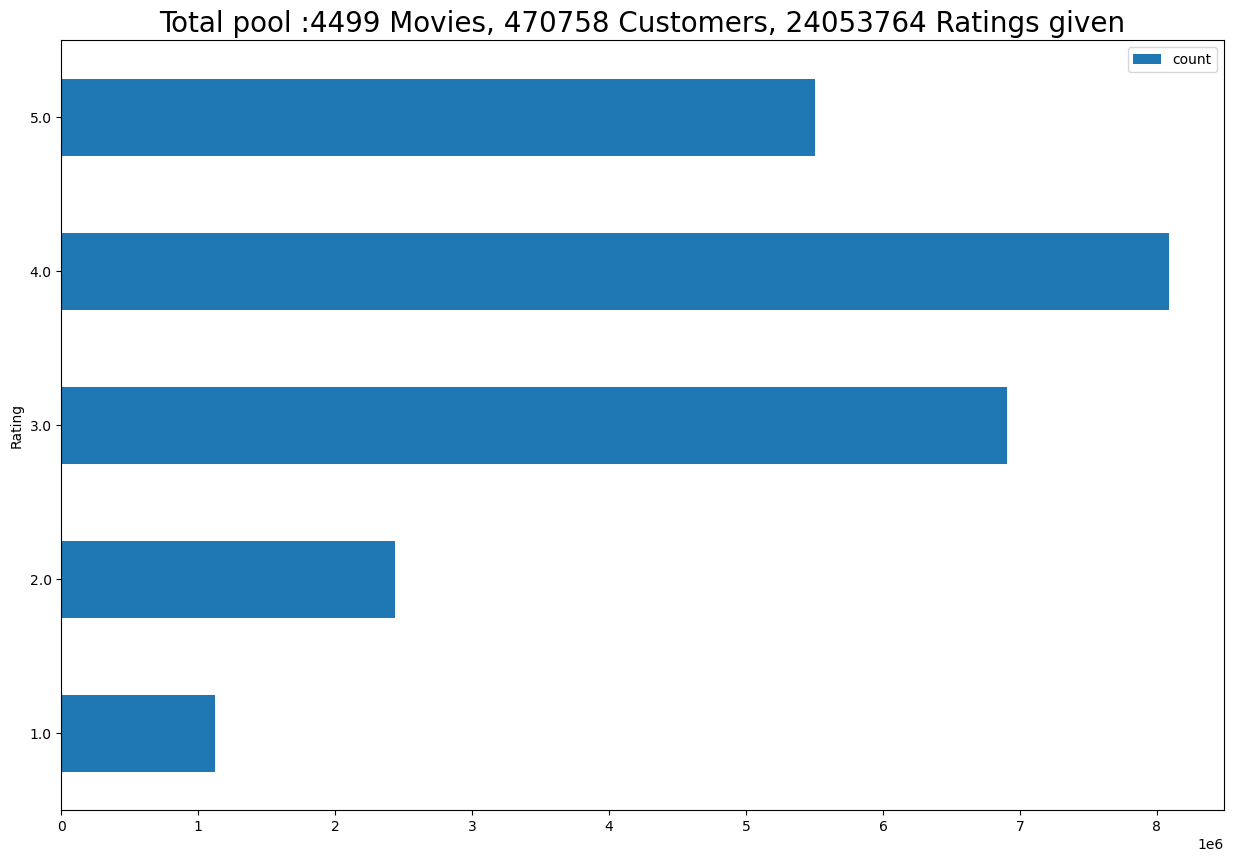

In [10]:
fig = p.plot(kind = 'barh' , legend = True, figsize = (15,10))
plt.title(f'Total pool :{mcount} Movies, {ccount} Customers, {rcount} Ratings given',fontsize = 20)

In [11]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [12]:
movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):

    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [13]:
df = df[pd.notnull(df['Rating'])]
df['Movie_Id'] = movie_np.astype(int)
df['cud_ID'] =df['cud_ID'].astype(int)
df.head()

,cud_ID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [14]:
f = ['count','mean']

In [15]:
dataset_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [16]:
dataset_cust_summary = df.groupby('cud_ID')['Rating'].agg(f) 
dataset_cust_summary.index = dataset_cust_summary.index.map(int) 
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [17]:
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['cud_ID'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(df.shape))

After Trim Shape: (17337458, 3)


In [18]:
df.head()

,cud_ID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [19]:
df_p = pd.pivot_table(df,values='Rating',index='cud_ID',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [21]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
cud_ID,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_title = pd.read_csv('movie_titles.csv',names =  ['Movie_Id', 'Year', 'Name'], header = None,usecols = [0,1,2])

df_title.set_index('Movie_Id', inplace = True)

In [20]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [ ]:
conda install -c conda-forge scikit-surprise

In [23]:
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [24]:
reader = Reader()
data = Dataset.load_from_df(df[['cud_ID', 'Movie_Id', 'Rating']][:100000], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9911  1.0002  1.0001  0.9971  0.0043  
MAE (testset)     0.8052  0.8097  0.7986  0.8045  0.0045  
Fit time          1.77    1.76    1.47    1.66    0.14    
Test time         3.01    0.33    0.41    1.25    1.25    


{'test_rmse': array([0.99107179, 1.00018896, 1.00011198]),
 'test_mae': array([0.80516268, 0.80965683, 0.79861693]),
 'fit_time': (1.765568494796753, 1.7551355361938477, 1.4686987400054932),
 'test_time': (3.009470224380493, 0.3281111717224121, 0.40622568130493164)}

In [26]:
df.head(10)

,cud_ID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3
703,1644750,3.0,3
704,2031561,4.0,3
705,616720,4.0,3
706,2467008,4.0,3


In [25]:
dataset_712664 = df[(df['cud_ID'] == 712664) & (df['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

In [26]:
user_712664 = df_title.copy()
user_712664 = user_712664.reset_index()
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]

In [27]:
data = Dataset.load_from_df(df[['cud_ID', 'Movie_Id', 'Rating']], reader)

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

In [ ]:
user_712664 = user_712664.drop('Movie_Id', axis = 1)

In [ ]:
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

In [ ]:
print(user_712664.head(10))